<a href="https://colab.research.google.com/github/keshav5857/Machine-Learning/blob/main/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective

Demonstrate SVM classification using the Car Evaluation dataset and visualize results.

Q1: Import Required Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('Libraries imported')


Libraries imported


Q2: Load Dataset (Iris)

In [5]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

df = pd.read_csv(url, names=columns)
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Q3: Explore Dataset

In [6]:
print('Shape:', df.shape)
print('Classes:', df['class'].unique())
df.describe(include='all')

Shape: (1728, 7)
Classes: ['unacc' 'acc' 'vgood' 'good']


,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


Q4: Select Features (two for visualization)

In [7]:
encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col])

X = df[['buying', 'safety']]
y = df['class']
X.head()

,buying,safety
0,3,1
1,3,2
2,3,0
3,3,1
4,3,2


Q5: Train–Test Split (70:30)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

print('Training size:', X_train.shape)
print('Testing size:', X_test.shape)

Training size: (1209, 2)
Testing size: (519, 2)


Q6: Build SVM Model (Linear Kernel)

In [9]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
print('Model trained')

Model trained


Q7: Predict Test Data

In [10]:
y_pred = svm.predict(X_test)
list(y_pred)[:10]

[np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2)]

Q8: Compare Predictions (Correct / Wrong)

In [11]:
results = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})

results['Status'] = results.apply(
    lambda r: 'Correct' if r.Actual == r.Predicted else 'Wrong', axis=1
)

results.head(20)

,Actual,Predicted,Status
0,2,2,Correct
1,0,2,Wrong
2,2,2,Correct
3,0,2,Wrong
4,2,2,Correct
5,0,2,Wrong
6,2,2,Correct
7,2,2,Correct
8,2,2,Correct
9,2,2,Correct


Q9: Evaluate Model Performance

In [12]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.6897880539499036

Confusion Matrix:
 [[  0   0 118   0]
 [  0   0  19   0]
 [  0   0 358   0]
 [  0   0  24   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       118
           1       0.00      0.00      0.00        19
           2       0.69      1.00      0.82       358
           3       0.00      0.00      0.00        24

    accuracy                           0.69       519
   macro avg       0.17      0.25      0.20       519
weighted avg       0.48      0.69      0.56       519



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Q10: Visualize Decision Boundary

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


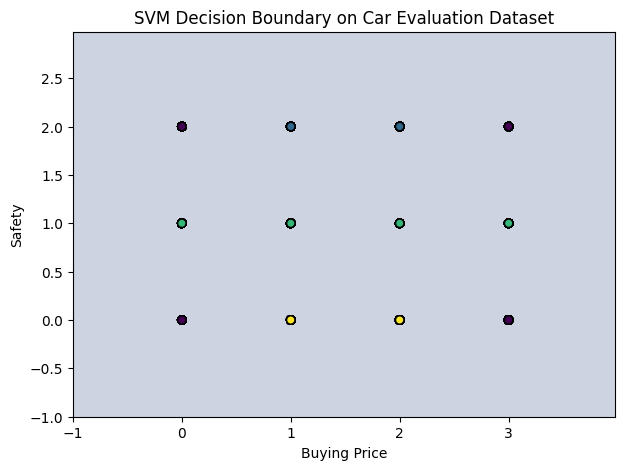

In [13]:
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.02),
    np.arange(y_min, y_max, 0.02)
)

Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7,5))
plt.contourf(xx, yy, Z, alpha=0.25)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='k')
plt.xlabel('Buying Price')
plt.ylabel('Safety')
plt.title('SVM Decision Boundary on Car Evaluation Dataset')
plt.show()


Conclusion

In this experiment, a Support Vector Machine (SVM) classifier was successfully implemented on the Car Evaluation dataset. Since the dataset contains only categorical attributes, label encoding was applied to convert them into numerical form suitable for model training. Two features (buying and safety) were selected to enable 2D visualization of the decision boundary.